# Insurance Price Prediction

In [178]:
import numpy as np
import pandas as pd
import plotly.express as px
import missingno as mi
import sklearn
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, root_mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [179]:
special_characters = ['!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '-', '_', '+', '=', '|', '\\', '<', '>', '?', '/', ';', ':', "'", '"', '[', ']', '{', '}']
df1 = pd.read_csv(r"C:\Users\Infinity\Documents\OS Projects\Datasets\insurance price prediction.csv",na_values=special_characters)
df1.sample(7)

,age,sex,bmi,children,smoker,region,charges
530,57,male,42.130,1,yes,southeast,48675.51770
156,48,male,24.420,0,yes,southeast,21223.67580
1022,47,male,36.080,1,yes,southeast,42211.13820
694,27,female,34.800,1,no,southwest,3577.99900
907,44,female,32.340,1,no,southeast,7633.72060
228,41,female,31.635,1,no,northeast,7358.17565
924,43,male,23.200,0,no,southwest,6250.43500


<Axes: >

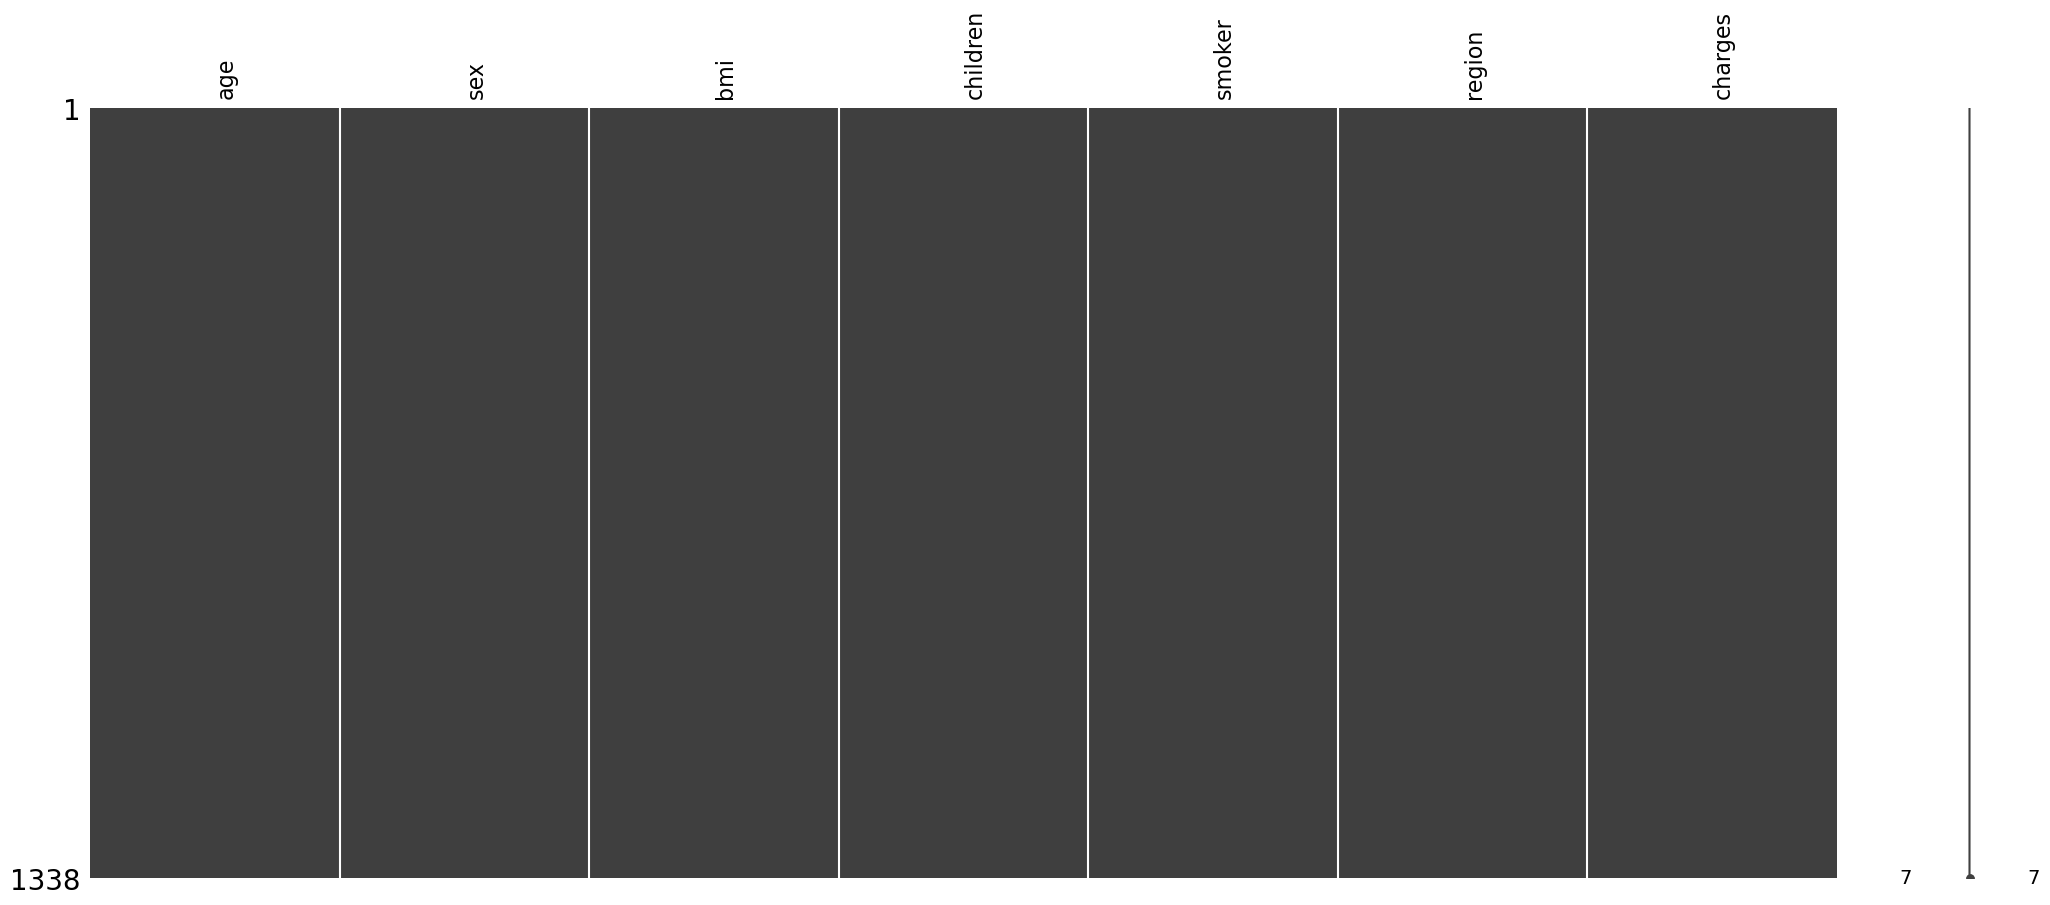

In [180]:
mi.matrix(df1,label_rotation = 90)

<Axes: >

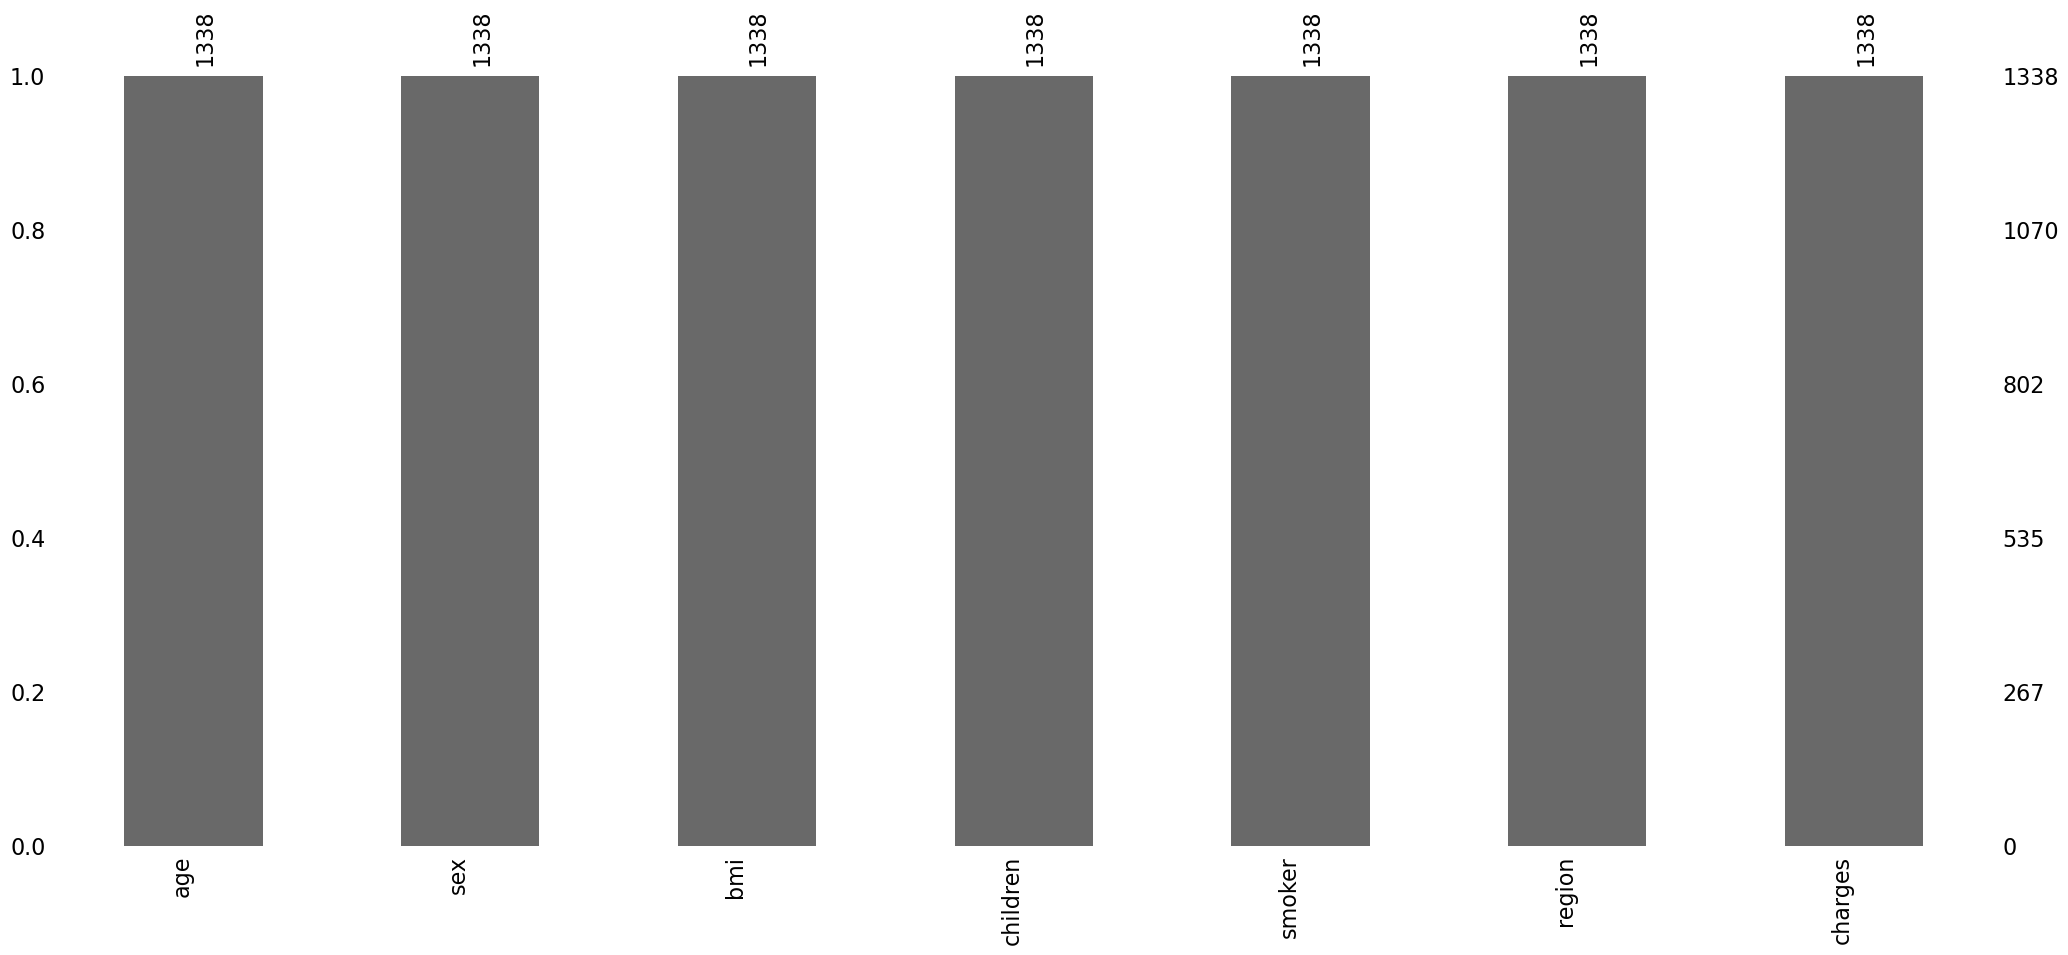

In [181]:
mi.bar(df1,label_rotation = 90)

In [182]:
df1.isnull().sum().sum()

0

# Dataset has no missing values

In [183]:
df1[df1.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [184]:
df = df1.drop_duplicates()

In [185]:
df.duplicated().sum()

0

# One Duplicate Datapoint is removed

In [186]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


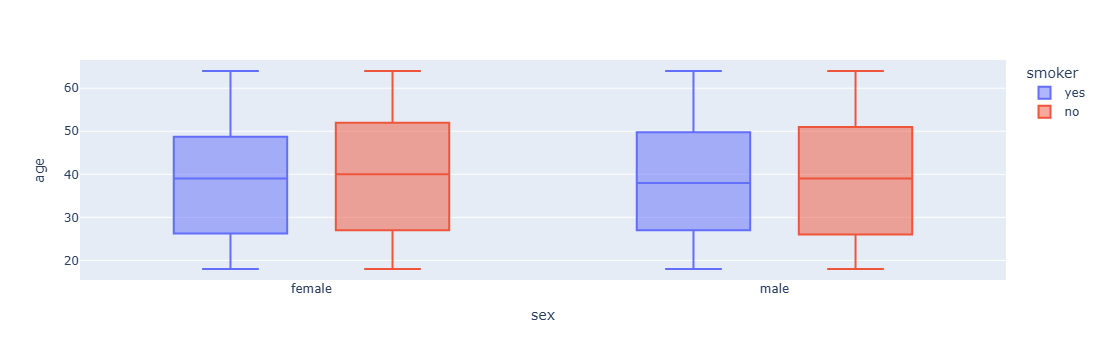

In [188]:
px.box(df,y='age',x='sex',color = 'smoker')

# The age distribution is almost similar for smokers & non smokers for both genders

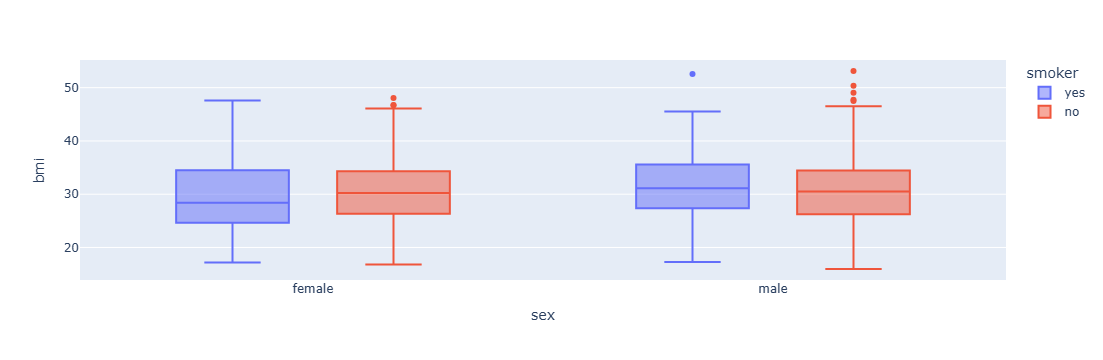

In [189]:
px.box(df,y='bmi',x='sex',color = 'smoker')

# The bmi distribution is almost for smokers & non smokers for both genders except few outliers

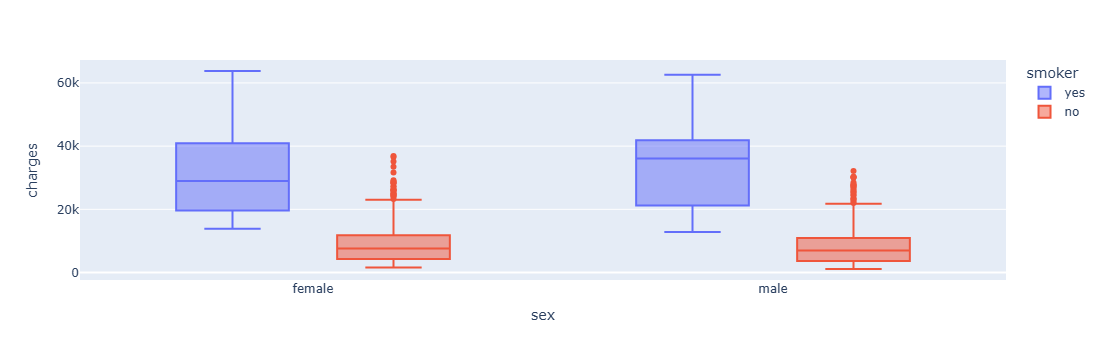

In [190]:
px.box(df,y='charges',x='sex',color = 'smoker')

- The insurance price distribution is almost for smokers & non smokers for both genders, except that outliers are present for non smokers for both genders
- The charges are higher for smoker as compared to non smokers for both genders
- The median charges are 4 times higher for smokers as compared to non smokers

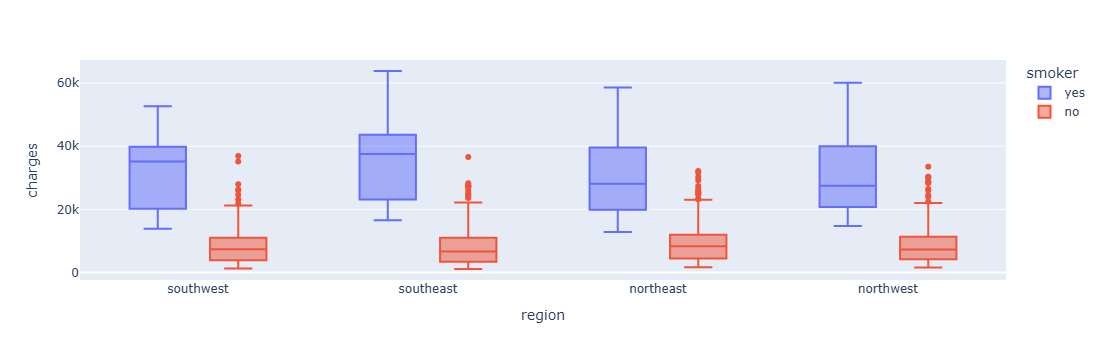

In [191]:
px.box(df,y='charges',x='region',color = 'smoker')

- The insurance price distribution is almost for non smokers across regions, except that outliers are present
- The insurance price distribution is non uniform for smokers across regions, southeast has higher variation with high median charges as compared to other regions


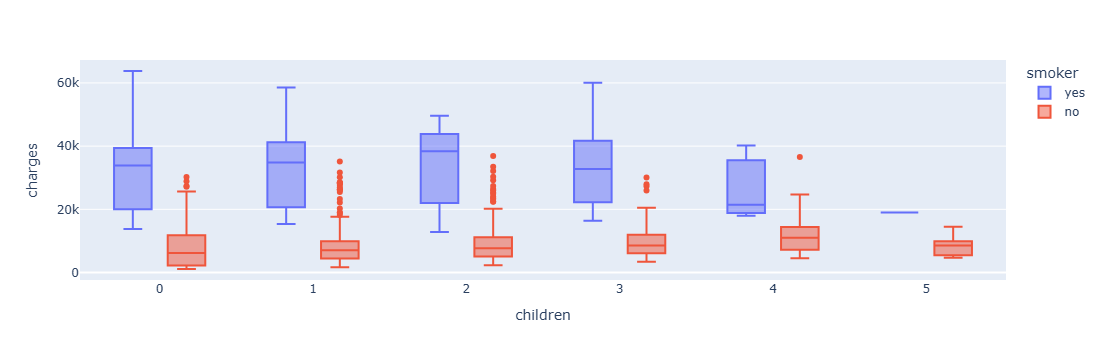

In [192]:
px.box(df,y='charges',x='children',color = 'smoker')

- The charges for smokers is highest for people with no children, also they have highest variation in charges
- No data is available for smoker with 5 children hence it is represented by dash line 

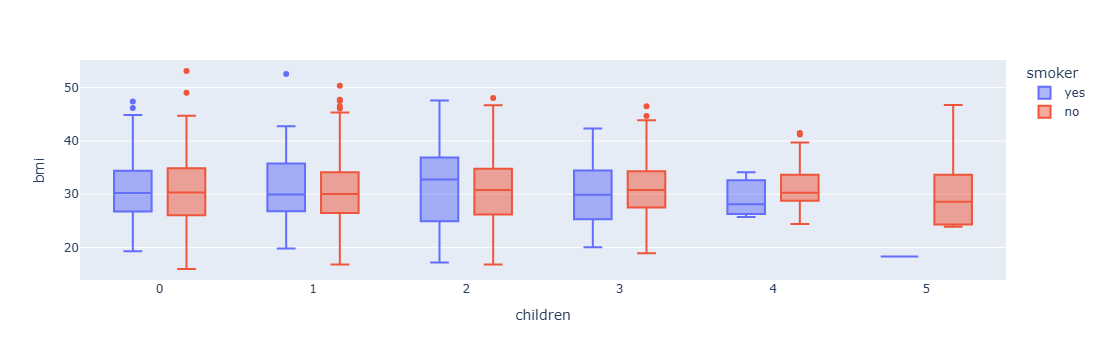

In [193]:
px.box(df,y='bmi',x='children',color = 'smoker')

# The BMI distribution is almost similar for people with different children for both smokers & non smokers

# Data Preprocessing

In [194]:
from sklearn.preprocessing import RobustScaler, LabelEncoder
ss = RobustScaler()
le = LabelEncoder()

In [195]:
df['age'] = ss.fit_transform(df[['age']])
df['bmi'] = ss.fit_transform(df[['bmi']])

In [196]:
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [197]:
df

,age,sex,bmi,children,smoker,region,charges
0,-0.833333,0,-0.297265,0,1,3,16884.92400
1,-0.875000,1,0.400713,1,0,2,1725.55230
2,-0.458333,1,0.309156,3,0,2,4449.46200
3,-0.250000,1,-0.914982,0,0,1,21984.47061
4,-0.291667,1,-0.180737,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,0.458333,1,0.067776,3,0,1,10600.54830
1334,-0.875000,0,0.180737,0,0,0,2205.98080
1335,-0.875000,0,0.766944,0,0,2,1629.83350
1336,-0.750000,0,-0.546968,0,0,3,2007.94500


In [198]:
x = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

In [199]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x.columns 
vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                          for i in range(len(x.columns))] 
vif_data.sort_values(by='VIF')

,feature,VIF
0,age,1.015345
2,bmi,1.031026
4,smoker,1.217863
3,children,1.549440
1,sex,1.651812
5,region,1.814618


# No multicollinearity

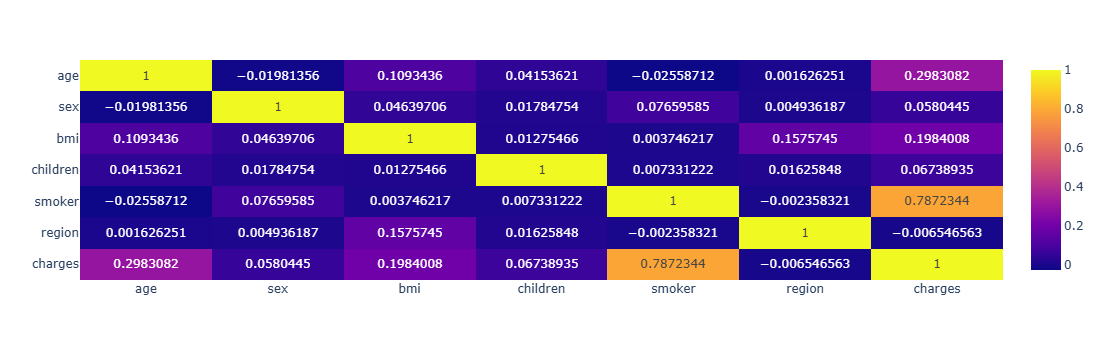

In [200]:
corr_matrix = df.corr()

fig = px.imshow(corr_matrix, text_auto=True, aspect = 'cool')
fig.show()

- Insurance charge has high positive correlation with smoker, smokers have to pay higher premium
- There is also low positive correlation of insurance charges with age & bmi 

# Model Evaluation

In [201]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error,accuracy_score

In [202]:
lr = LinearRegression()
lr

LinearRegression()

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,random_state = 42, test_size = .25,shuffle = True)

In [205]:
lr.fit(xtrain,ytrain)
ypredict = lr.predict(xtest)
print(f'R2 = {r2_score(ytest,ypredict)*100:.2f}%')
RMSE = root_mean_squared_error(ytest,ypredict)
print(f'RMSE = {RMSE:.2f}')

R2 = 79.63%
RMSE = 5935.40


In [227]:
lr.coef_

array([ 5.90159261e+03, -1.74679413e+01,  2.64125380e+03,  5.28365682e+02,
        2.30716633e+04, -2.03119474e+02])

In [228]:
lr.intercept_

8028.562572175514

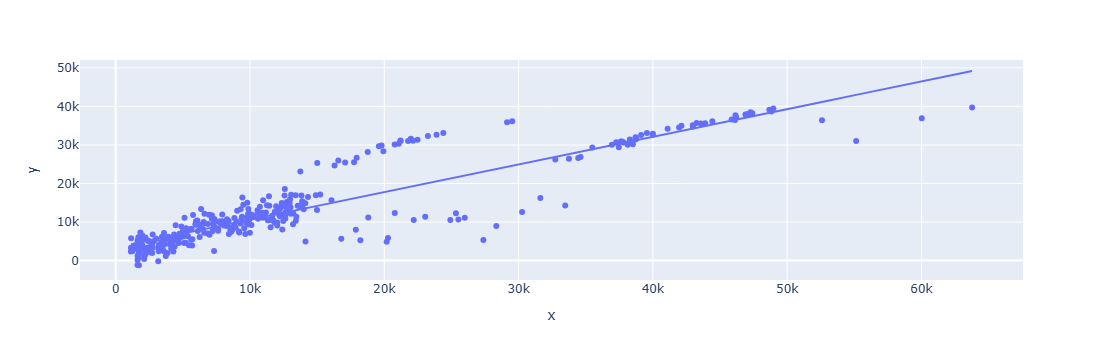

In [226]:
px.scatter(df,x= ytest,y = ypredict, trendline = 'ols')

# Ridge Regression

In [212]:
from sklearn.linear_model import Ridge
rd = Ridge()
rd.fit(xtrain,ytrain)
ypred_rd = rd.predict(xtest)

from sklearn.metrics import root_mean_squared_error, r2_score
r2_score = r2_score(ytest,ypred_rd)
root_mean_squared_error = root_mean_squared_error(ytest,ypred_rd)
print(f'R2 = {r2_score*100:.2f}%')
print(f'RMSE = {root_mean_squared_error:.2f}')

R2 = 79.53%
RMSE = 5948.94


# ElasticNet

In [213]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(xtrain,ytrain)
ypred_en = en.predict(xtest)

from sklearn.metrics import root_mean_squared_error, r2_score
r2_score = r2_score(ytest,ypred_en)
root_mean_squared_error = root_mean_squared_error(ytest,ypred_en)
print(f'R2 = {r2_score*100:.2f}%')
print(f'RMSE = {root_mean_squared_error:.2f}')

R2 = 34.06%
RMSE = 10677.78


# Random forest

In [218]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

rfr = RandomForestRegressor(n_estimators=20, max_depth=5, random_state=42)
rfr.fit(xtrain, ytrain)
ypred_rfr = rfr.predict(xtest)
r2_score = r2_score(ytest,ypred_rfr)
print(f'R2 = {r2_score*100:.2f}%')
print(f'RMSE = {root_mean_squared_error(ytest,ypred_rfr):.2f}')


R2 = 88.55%
RMSE = 4449.67


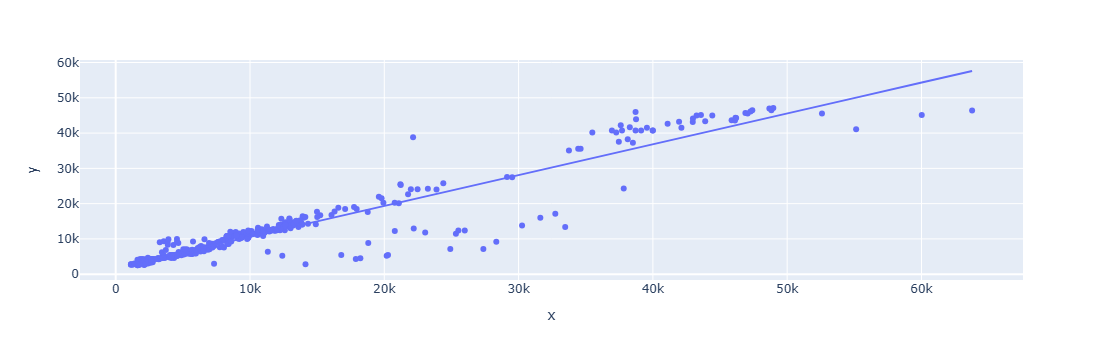

In [219]:
px.scatter(df,x= ytest,y = ypred_rfr, trendline = 'ols')

# Random forest predicts better results as compared to other models